# `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Read Data

In [4]:
# Read the dataset into a DataFrame
df = pd.read_csv("dollar_tree_2.csv")

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

   index       Date    Year     Month  Customer Age Customer Gender  \
0      0  2/19/2016  2016.0  February          29.0               F   
1      1  2/20/2016  2016.0  February          29.0               F   
2      2  2/27/2016  2016.0  February          29.0               F   
3      3  3/12/2016  2016.0     March          29.0               F   
4      4  3/12/2016  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50

## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [6]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

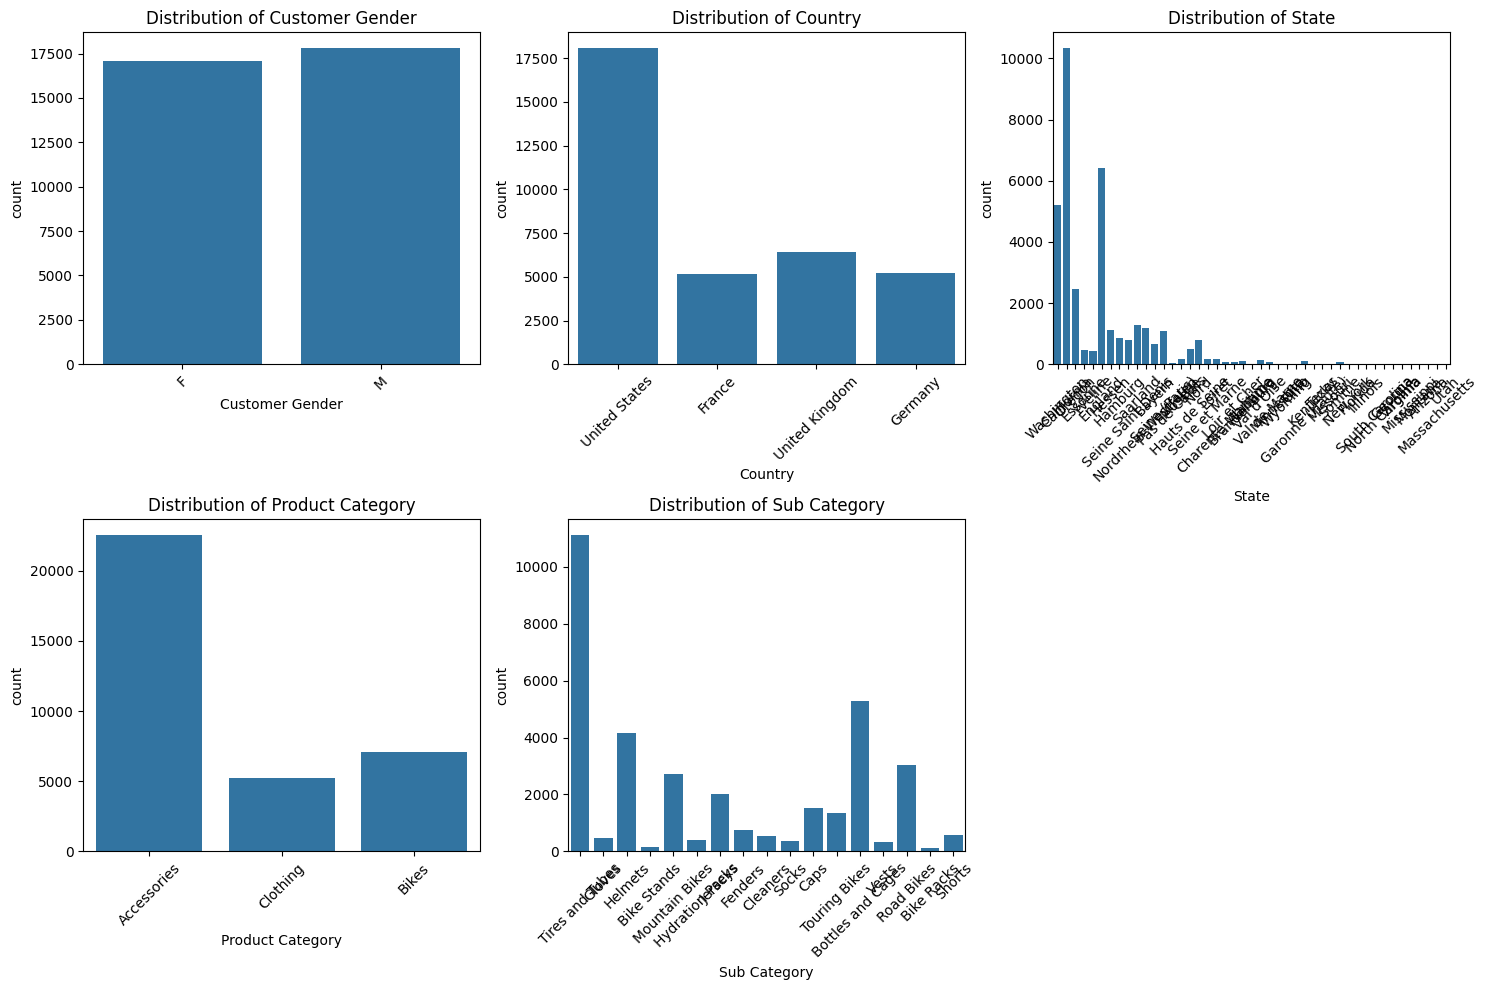

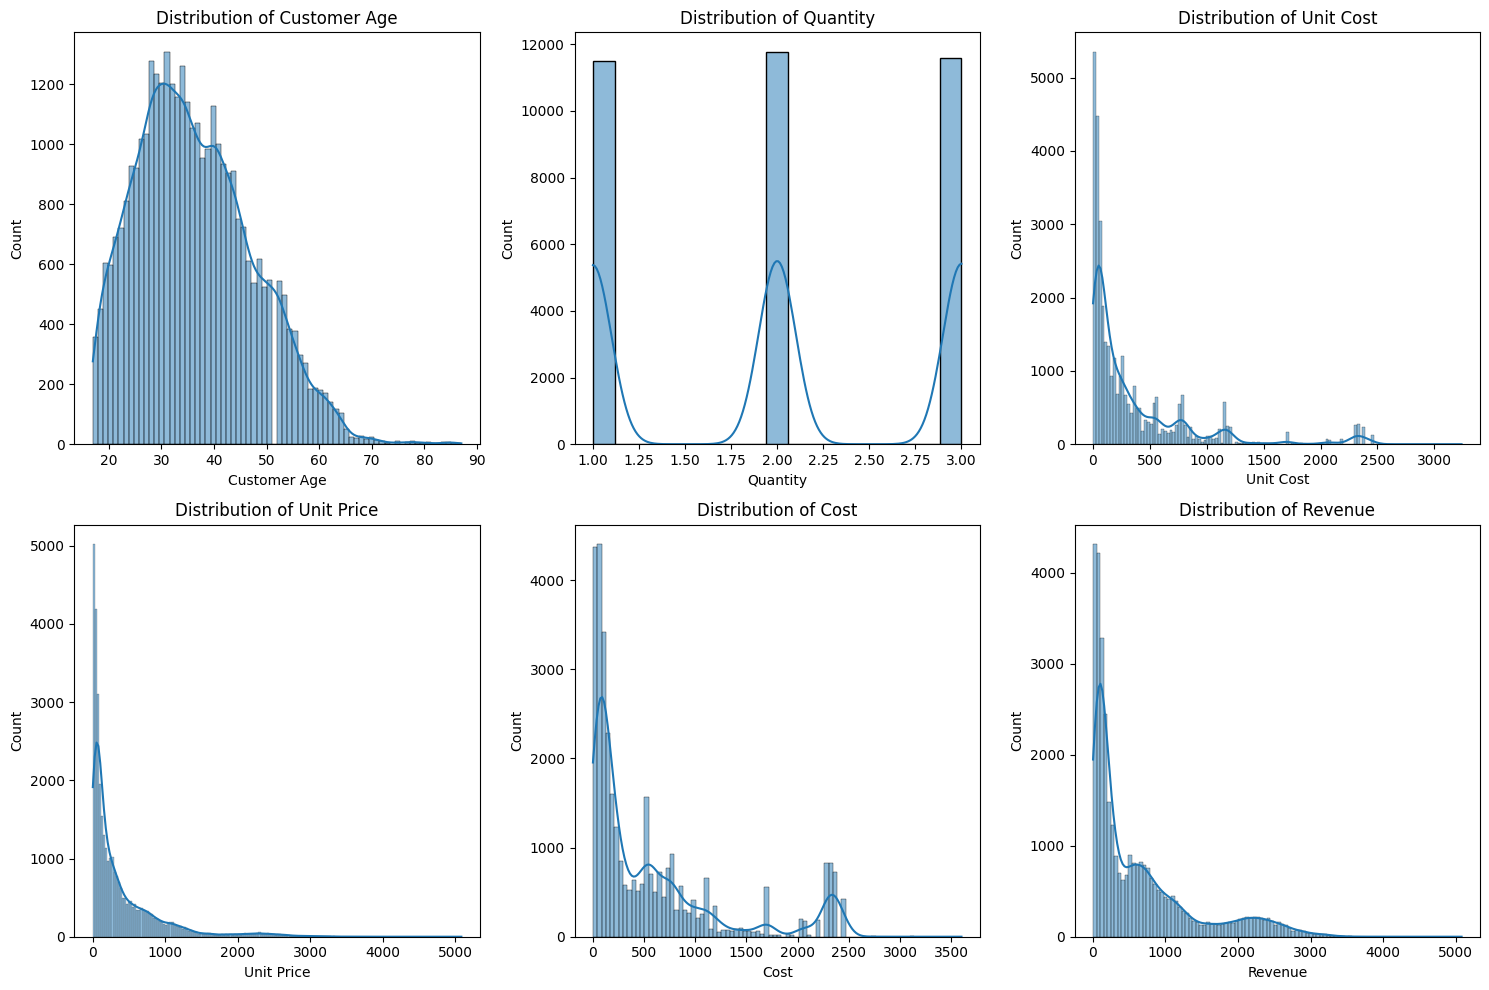

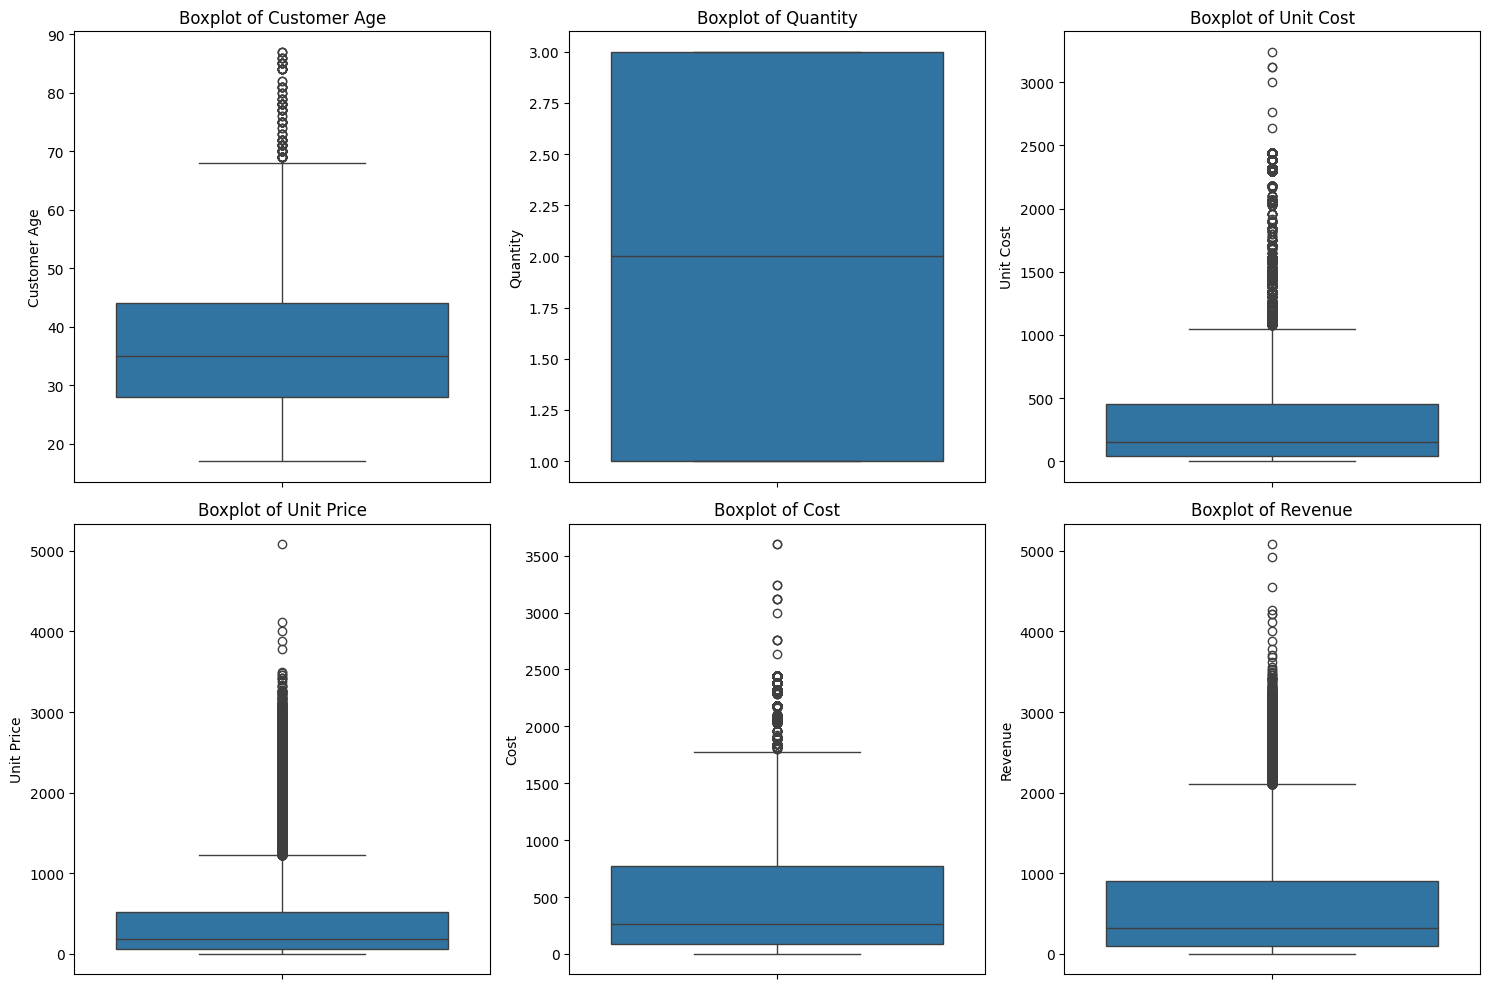

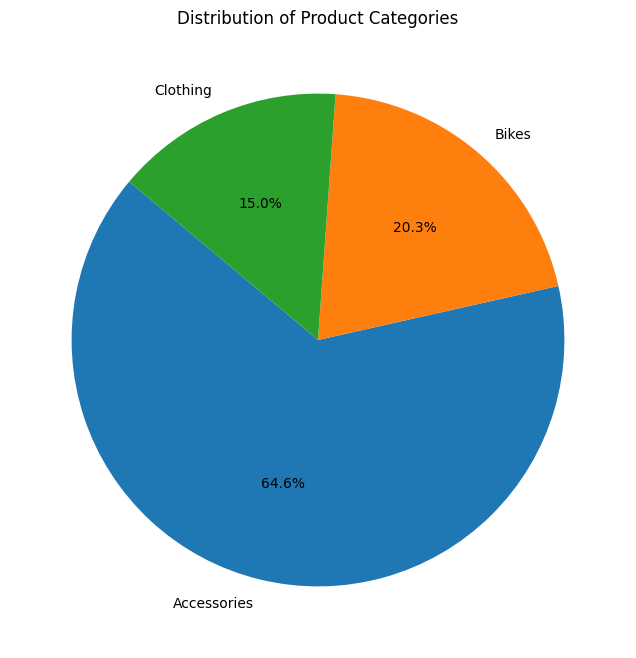

Cross-tabulation of Product Category and Sub Category:
Sub Category      Bike Racks  Bike Stands  Bottles and Cages  Caps  Cleaners  \
Product Category                                                               
Accessories              103          145               5295     0       545   
Bikes                      0            0                  0     0         0   
Clothing                   0            0                  0  1517         0   

Sub Category      Fenders  Gloves  Helmets  Hydration Packs  Jerseys  \
Product Category                                                       
Accessories           762       0     4176              396        0   
Bikes                   0       0        0                0        0   
Clothing                0     480        0                0     2000   

Sub Category      Mountain Bikes  Road Bikes  Shorts  Socks  Tires and Tubes  \
Product Category                                                               
Accessories            

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of categorical variables
categorical_cols = ["Customer Gender", "Country", "State", "Product Category", "Sub Category"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms for numerical variables
numerical_cols = ["Customer Age", "Quantity", "Unit Cost", "Unit Price", "Cost", "Revenue"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Pie Chart: Distribution of Product Categories
plt.figure(figsize=(8, 8))
df['Product Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Categories')
plt.ylabel('')
plt.show()

# Cross-tabulations
cross_tab = pd.crosstab(df["Product Category"], df["Sub Category"])
print("Cross-tabulation of Product Category and Sub Category:")
print(cross_tab)

# Missing value analysis
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


# `Data Preparation`

## Data Cleaning

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
index                   0
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [12]:
from sklearn.impute import SimpleImputer

# Define columns with missing values
numerical_cols = ["Year", "Customer Age", "Quantity", "Unit Cost", "Unit Price", "Cost"]
categorical_cols = ["Month", "Customer Gender", "Country", "State", "Product Category", "Sub Category"]

# Impute missing values in numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values in categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Drop the "Column1" column due to a large number of missing values
df.drop(columns=['Column1'], inplace=True)

# Check if there are any remaining missing values
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)


Missing values after handling:
index               0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


## Divide data into input and output

In [13]:
# Input features (X)
X = df.drop(columns=['Product Category'])

# Target variable (y)
y = df['Product Category']

# Print the shapes of X and y to confirm
print("Shape of input features (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of input features (X): (34867, 13)
Shape of target variable (y): (34867,)


## Encoding

### 1. Encode the target column (the labels)


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Reshape y to a 2D array (required by OneHotEncoder)
y_reshaped = y.values.reshape(-1, 1)

# Fit and transform the encoder on the target variable
y_encoded = encoder.fit_transform(y_reshaped)

# Convert the encoded sparse matrix to a dense array
y_encoded_array = y_encoded.toarray()

# Print the shape of the encoded target variable
print("Shape of encoded target variable (y_encoded_array):", y_encoded_array.shape)


Shape of encoded target variable (y_encoded_array): (34867, 3)


### 2. Encode categorical columns

In [15]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical columns
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded sparse matrix to a dense array
X_encoded_array = X_encoded.toarray()

# Print the shape of the encoded input features
print("Shape of encoded input features (X_encoded_array):", X_encoded_array.shape)


Shape of encoded input features (X_encoded_array): (34867, 80)


In [17]:
# Reset index of X and X_encoded_df
X.reset_index(drop=True, inplace=True)
X_encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame with the remaining numerical columns
X_encoded_final = pd.concat([X, X_encoded_df], axis=1)

# Print the first few rows of the encoded input features
print("Encoded input features:")
print(X_encoded_final.head())



Encoded input features:
   index    Year  Customer Age  Quantity  Unit Cost  Unit Price   Cost  \
0      0  2016.0          29.0       1.0      80.00  109.000000   80.0   
1      1  2016.0          29.0       2.0      24.50   28.500000   49.0   
2      2  2016.0          29.0       3.0       3.67    5.000000   11.0   
3      3  2016.0          29.0       2.0      87.50  116.500000  175.0   
4      4  2016.0          29.0       3.0      35.00   41.666667  105.0   

   Revenue  Month_April  Month_August  ...  Sub Category_Helmets  \
0    109.0          0.0           0.0  ...                   0.0   
1     57.0          0.0           0.0  ...                   0.0   
2     15.0          0.0           0.0  ...                   0.0   
3    233.0          0.0           0.0  ...                   0.0   
4    125.0          0.0           0.0  ...                   0.0   

   Sub Category_Hydration Packs  Sub Category_Jerseys  \
0                           0.0                   0.0   
1       

# `Modeling`

In [18]:
#K-Nearest Neighbors (KNN) algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_final, y_encoded_array, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn_classifier.predict(X_test)

# `Evaluation`

In [19]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7698594780613708


### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

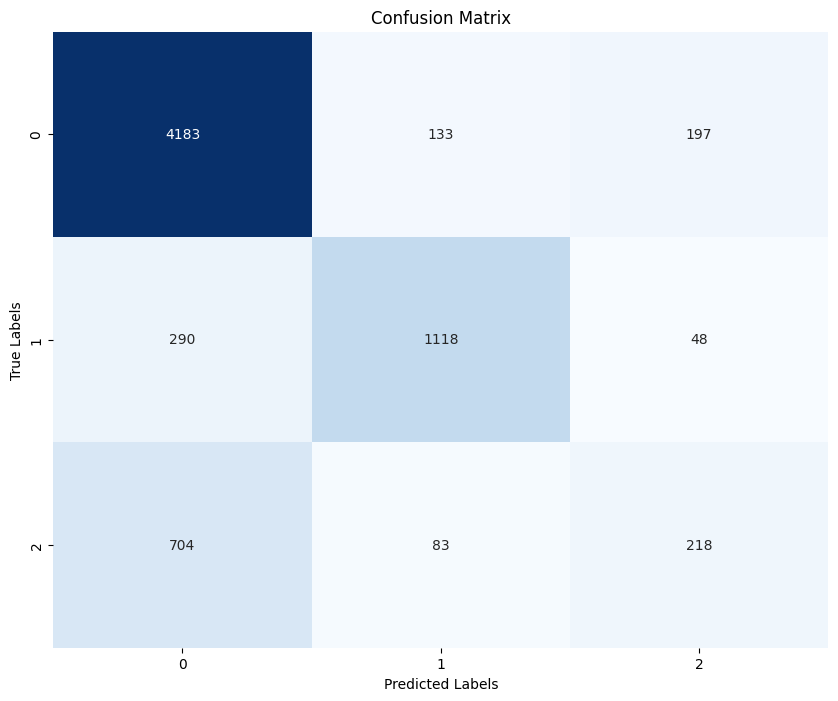

In [21]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Build a classification Report

In [20]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4513
           1       0.84      0.77      0.80      1456
           2       0.47      0.22      0.30      1005

   micro avg       0.81      0.77      0.79      6974
   macro avg       0.71      0.63      0.65      6974
weighted avg       0.78      0.77      0.77      6974
 samples avg       0.77      0.77      0.77      6974



C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.63421279036421
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      4513
           1       0.57      0.69      0.63      1456
           2       0.19      0.28      0.23      1005

    accuracy                           0.63      6974
   macro avg       0.53      0.56      0.54      6974
weighted avg       0.69      0.63      0.66      6974



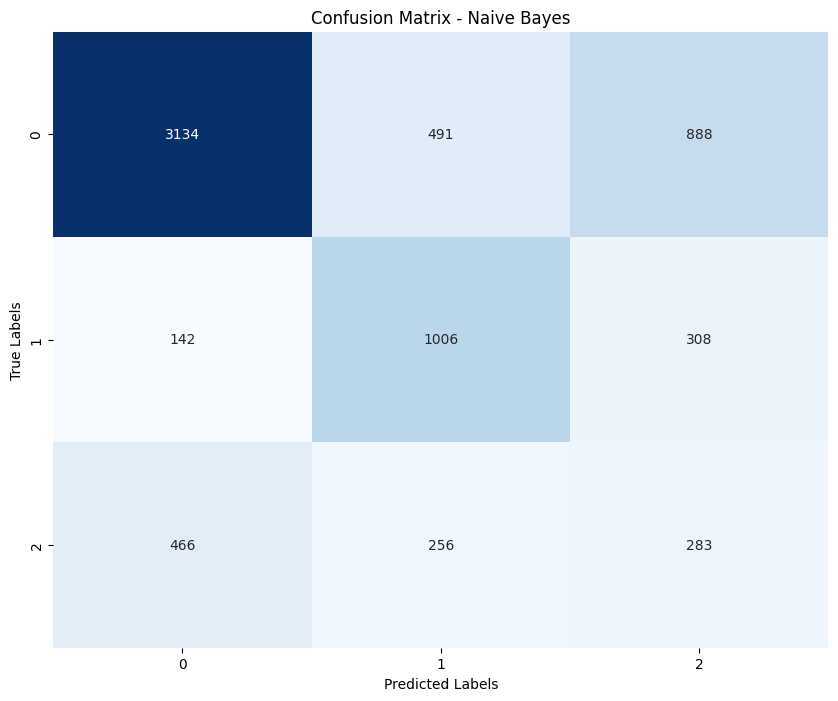

In [22]:
# Naive Bayes algorithm
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train.argmax(axis=1))  # Note: Naive Bayes doesn't support multilabel format

# Predict the labels for test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test.argmax(axis=1), y_pred_nb)
print("Accuracy:", accuracy_nb)

# Classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_nb))

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test.argmax(axis=1), y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4513
           1       1.00      1.00      1.00      1456
           2       1.00      1.00      1.00      1005

    accuracy                           1.00      6974
   macro avg       1.00      1.00      1.00      6974
weighted avg       1.00      1.00      1.00      6974



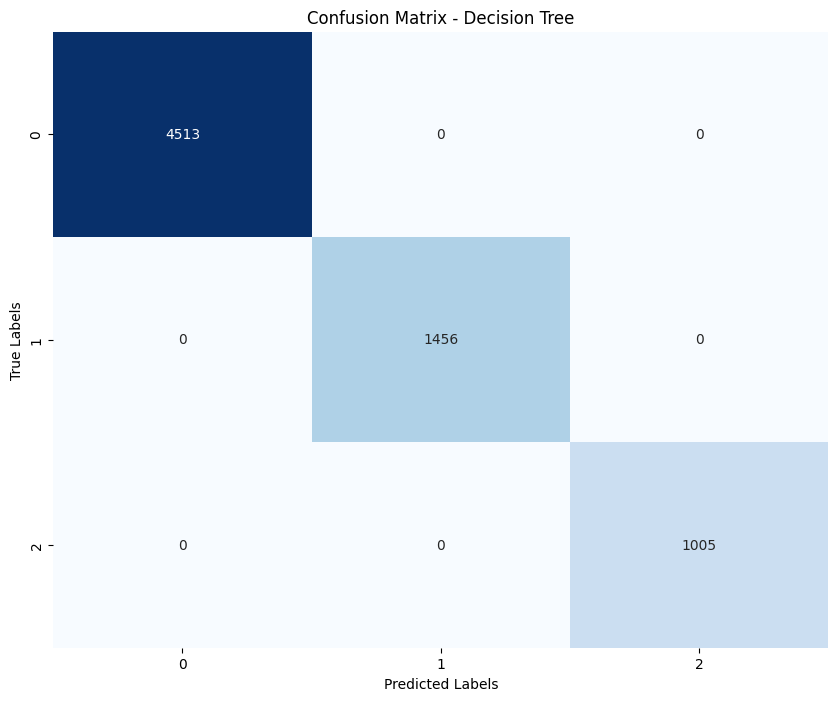

In [23]:
# Decision Tree classifier 

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier
decision_tree_classifier.fit(X_train, y_train.argmax(axis=1))

# Predict the labels for test set
y_pred_dt = decision_tree_classifier.predict(X_test)

# Evaluate the classifier
accuracy_dt = accuracy_score(y_test.argmax(axis=1), y_pred_dt)
print("Accuracy:", accuracy_dt)

# Classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_dt))

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test.argmax(axis=1), y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
